In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import src.preprocessing as prepro
import src.data_handler as data_handler
from src.models import LinealReg

raw_data : data_handler.RawData = data_handler.RawData()

In [2]:
engineered_data : data_handler.ProcessedData = data_handler.ProcessedData(correct_data_types=True, standarize=False, area_units='m2')
engineered_data.fill_missing_values(method='mean')
engineered_data.casas_dev['high_latitude'] = np.where(engineered_data.casas_dev['lat'] > 0, True, False)
engineered_data.casas_dev = engineered_data.casas_dev.drop(columns=['lon', 'lat'])
engineered_data.casas_dev.head()

,area,area_units,is_house,has_pool,age,price,rooms,high_latitude
0,59,m2,True,False,18,546,2,True
1,102,m2,False,False,9,759,3,True
2,62,m2,False,False,7,464,2,True
3,127,m2,True,True,16,251,4,False
4,128,m2,False,False,8,963,4,True


In [3]:
train : pd.DataFrame
validation : pd.DataFrame
train, validation = data_handler.get_train_and_validation_sets(engineered_data.casas_dev, train_fraction=0.8, seed=42)
train_standarized : pd.DataFrame = prepro.standarize_numeric_columns(train, excluded_columns=set(['lat', 'lon']))
validation_standarized : pd.DataFrame = prepro.standarize_numeric_columns(train, excluded_columns=set(['lat', 'lon']))
other_features = ['area', 'price', 'age', 'rooms', 'high_latitude']
train_means : dict[str, float] = {f : train[f].mean() for f in other_features}
train_stds : dict[str, float] = {f : train[f].std() for f in other_features}
validation_means : dict[str, float] = {f : validation[f].mean() for f in other_features}
validation_stds : dict[str, float] = {f : validation[f].std() for f in other_features}

5.2 )

In [4]:
# lin.fit_pseudo_inverse()
ws : dict[str, list[float]] = {
    'bias' : [],
    # 'area' : [],
    'high_latitude' : [],
}
ECMs : list[float] = []
Ls : list[float] = [0, 25, 50, 75, 100]
for l in Ls:
    lin : LinealReg = LinealReg(train_standarized[['high_latitude']].to_numpy(), train_standarized['price'].to_numpy(), L2=l)
    # lin.fit_gradient_descent(step_size=0.00005, tolerance=0.5, max_number_of_steps=-1)
    lin.fit_pseudo_inverse()
    ws['bias'].append(lin.coef[0])
    # ws['area'].append(lin.coef[1])
    # ws['high_latitude'].append(lin.coef[2])
    ws['high_latitude'].append(lin.coef[1])
    ECMs.append(lin.error_cuadratico_medio())
# print(len(ws['bias']))
# print(len(ws['high_latitude']))
# print(lin.error_cuadratico_medio())
# lin.print_coef(['high_latitude'])
plt.scatter(ws['bias'], ws['high_latitude'], c=ECMs, edgecolors='lightcyan')
plt.xlabel('bias (w0)')
plt.ylabel('high_latitude (w1)')
plt.xlim(-0.82, -0.35)
plt.colorbar(label='ECM')
for i, (x, y) in enumerate(zip(ws['bias'], ws['high_latitude'])):
    plt.text(x + 0.007, y - 0.005, f'L2 = {Ls[i]}', fontsize=8, ha='left', va='bottom')
plt.show()

TypeError: LinealReg.error_cuadratico_medio() missing 1 required positional argument: 'validation_set'

5.3 )

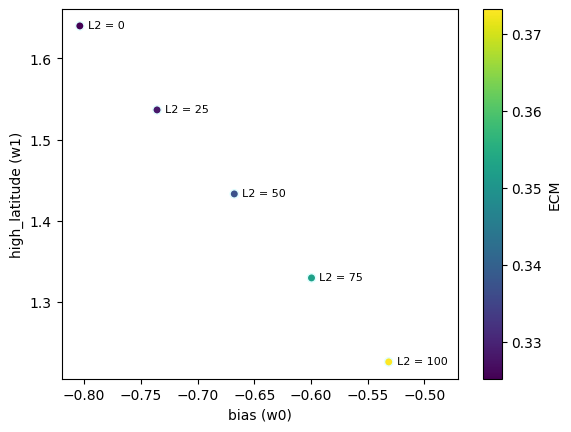

In [ ]:
# lin.fit_pseudo_inverse()
ws : dict[str, list[float]] = {
    'bias' : [],
    # 'area' : [],
    'high_latitude' : [],
}
ECMs : list[float] = []
Ls : list[float] = [0, 25, 50, 75, 100]
for l in Ls:
    lin : LinealReg = LinealReg(train_standarized[['high_latitude']].to_numpy(), train_standarized['price'].to_numpy(), L1=l)
    lin.fit_gradient_descent(step_size=0.00005, tolerance=0.5, max_number_of_steps=-1)
    # lin.fit_pseudo_inverse()
    ws['bias'].append(lin.coef[0])
    # ws['area'].append(lin.coef[1])
    # ws['high_latitude'].append(lin.coef[2])
    ws['high_latitude'].append(lin.coef[1])
    ECMs.append(lin.error_cuadratico_medio())
# print(len(ws['bias']))
# print(len(ws['high_latitude']))
# print(lin.error_cuadratico_medio())
# lin.print_coef(['high_latitude'])
plt.scatter(ws['bias'], ws['high_latitude'], c=ECMs, edgecolors='lightcyan')
plt.xlabel('bias (w0)')
plt.ylabel('high_latitude (w1)')
plt.xlim(-0.82, -0.47)
plt.colorbar(label='ECM')
for i, (x, y) in enumerate(zip(ws['bias'], ws['high_latitude'])):
    plt.text(x + 0.007, y - 0.005, f'L2 = {Ls[i]}', fontsize=8, ha='left', va='bottom')
plt.show()